Setup

In [28]:
import numpy as np
from tqdm import tqdm

import image_processor

from keras.applications.vgg16 import VGG16 
from keras.models import Model
import matplotlib.pyplot as plt


model_ft = VGG16()
model_ft = Model(inputs= model_ft.inputs,outputs = model_ft.layers[-2].output)

images, filenames = image_processor.processFolder("test/")

from keras.applications.vgg16 import preprocess_input 
x = preprocess_input(images)

features = model_ft.predict(x, use_multiprocessing=True, verbose=0)
feat = features.reshape(-1,4096)

Importing: 100%|██████████| 100% 100/100 [00:00]


test data

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

Clustering code

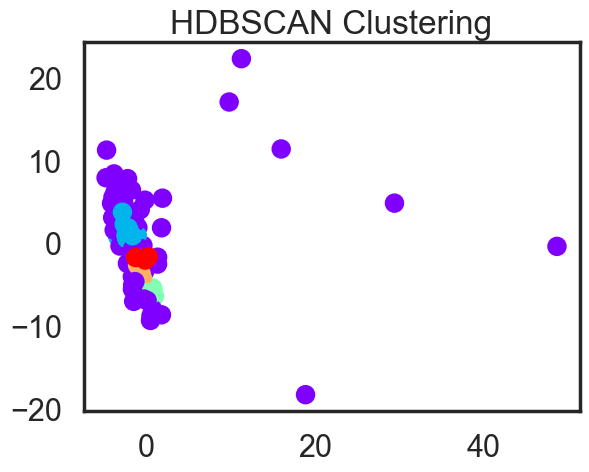

In [54]:
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.4, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, cluster_selection_epsilon=0.5,
    metric='manhattan', min_cluster_size=5, min_samples=None, p=None,allow_single_cluster=True)
clusterer.fit(x)
plt.scatter(x[:, 0], x[:, 1], c=clusterer.labels_, cmap='rainbow')
plt.title("HDBSCAN Clustering")
plt.show()

What ended up in which group then?

In [47]:
print(f"There are {clusterer.labels_.max()+1} clusters")
print(len(filenames))
print(len(clusterer.labels_))

There are 4 clusters
100
100


In [48]:
groups = {}
for file, cluster in zip(filenames,clusterer.labels_):
    #print(f"file {file}, cluster {cluster}")
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


Function to display clusters

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img 
def view_cluster(cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    print(len(files))
    if len(files) > 60:
        print(f"Clipping cluster size from {len(files)} to 60")
        files = files[:59]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Let's look at each

23


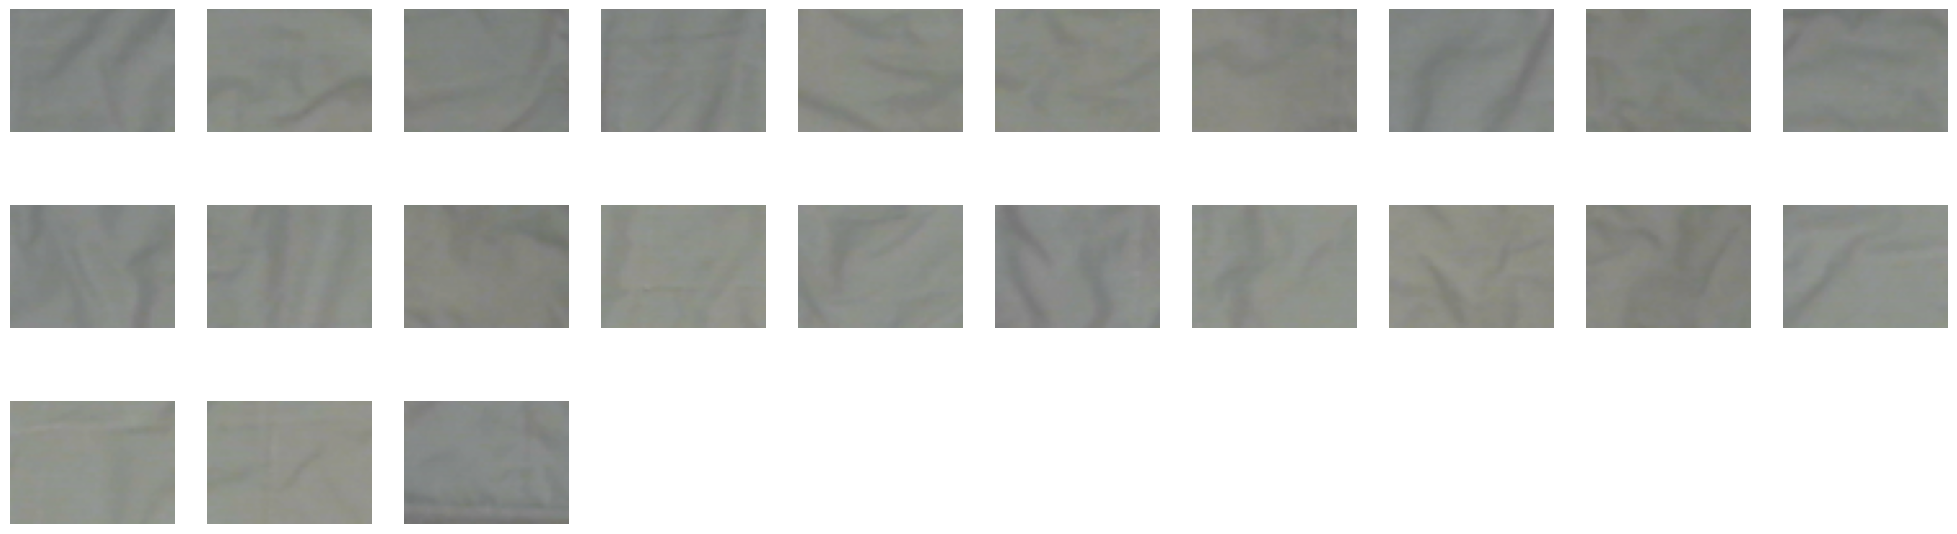

In [49]:
view_cluster(0)

8


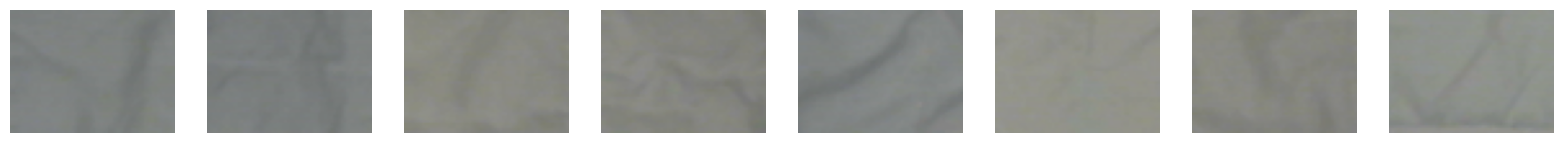

In [50]:
view_cluster(1)

6


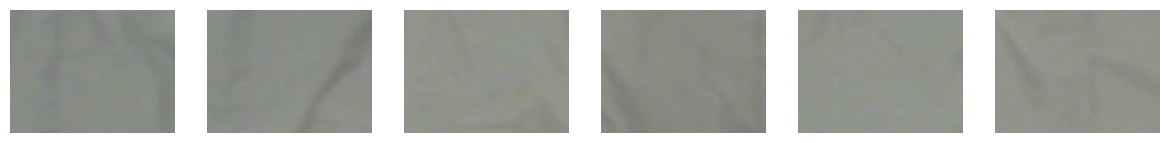

In [51]:
view_cluster(2)

13


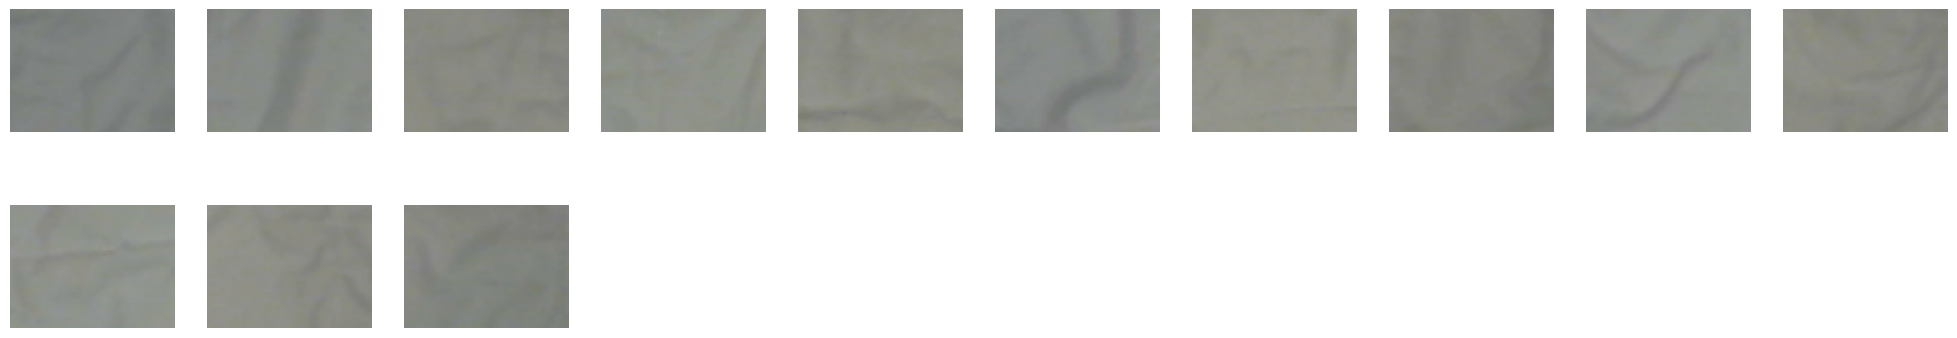

In [52]:
view_cluster(3)

50


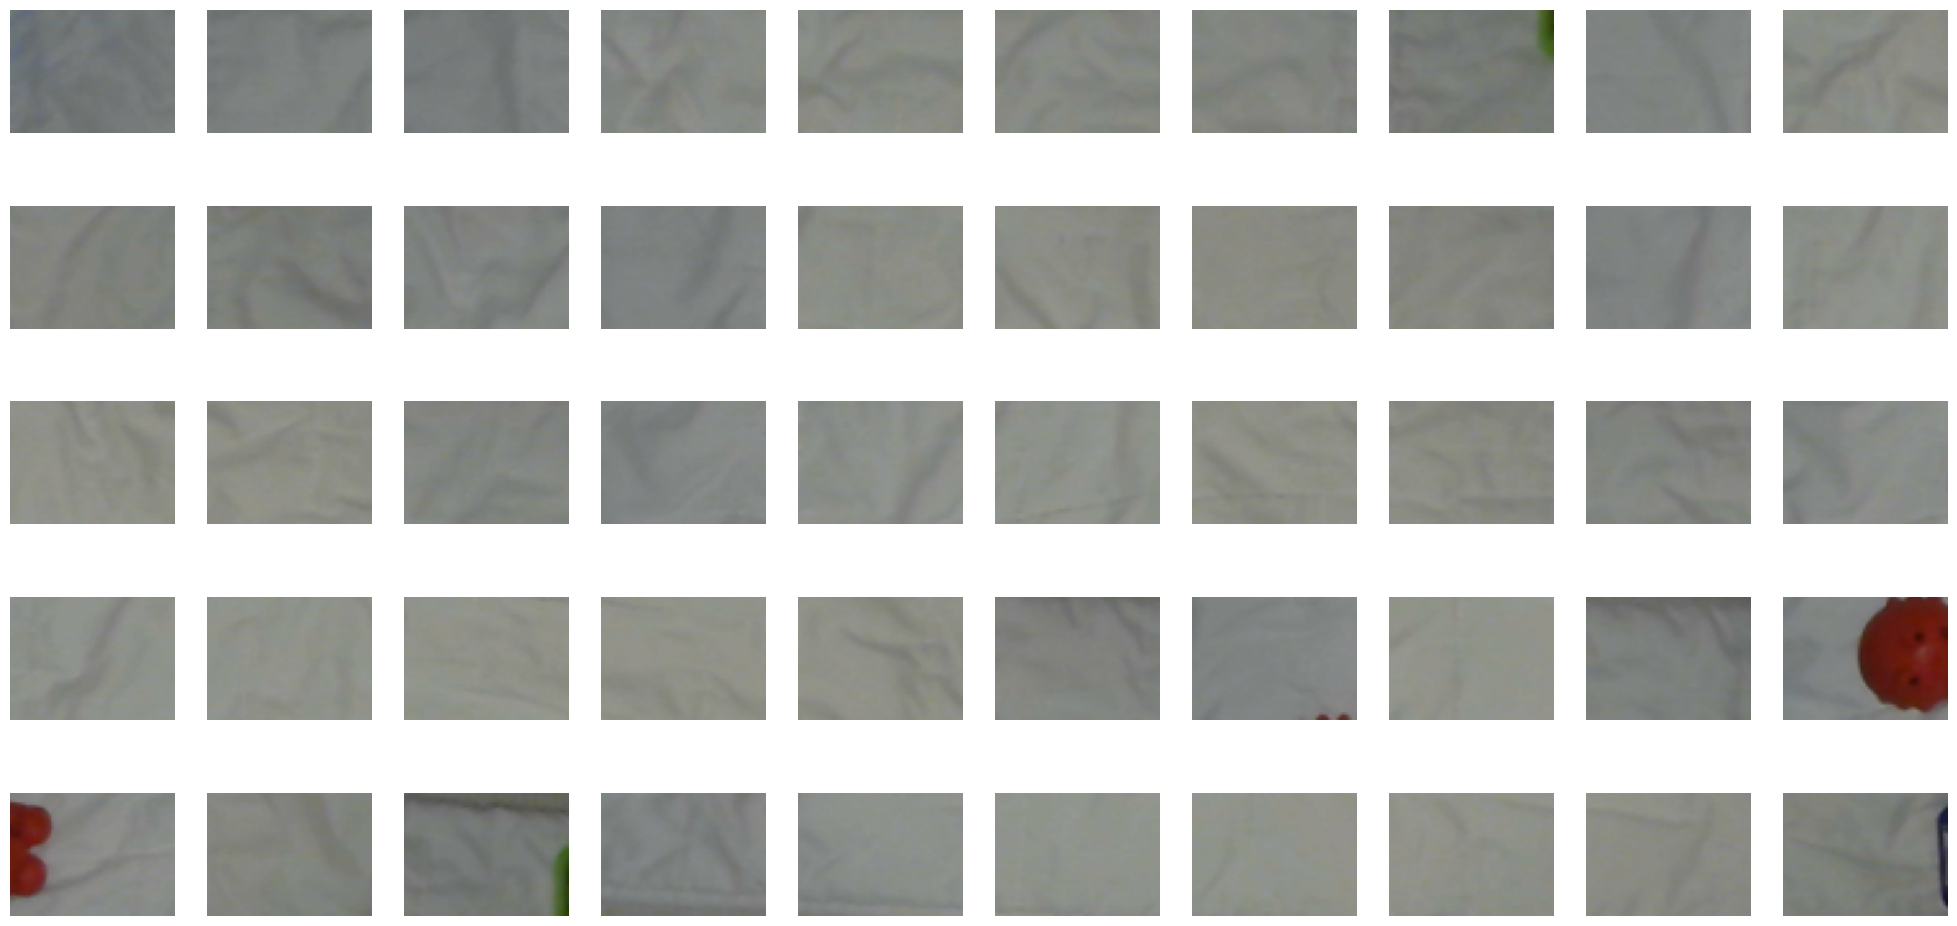

In [53]:
view_cluster(-1)